In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import *
from keras.layers import Dense
from keras import regularizers
from keras.regularizers import l2,l1
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score


In [2]:
df = pd.read_csv(r"C:\Users\Rupali\Downloads\PD data1 sent to Proajyot Sir.csv")

In [3]:
# SEED=42
# def seed_everything(seed):
#     np.random.seed(seed)
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     tf.random.set_seed(seed)

# seed_everything(SEED)

In [4]:
df = df.drop(["Sr.","name","MDVP:Shimmer(dB)","MDVP:PPQ","MDVP:Jitter(Abs)","Shimmer:APQ5","MDVP:Jitter(%)","MDVP:Flo(Hz)"], axis=1)

train_df, test_df = train_test_split(df, 
                                     test_size=0.2, 
                                     random_state=42)

train_df, val_df = train_test_split(train_df,
                                    test_size=0.2,
                                    random_state=42)

train_df.status.value_counts()

1    92
0    32
Name: status, dtype: int64

In [5]:
# c_1,c_0=train_df["status"].value_counts()
# c_1,c_0
# train_df_0=train_df.loc[df["status"]==0]
# train_df_1=train_df.loc[df["status"]==1]
# train_df_0.shape,train_df_1.shape
# class_over=train_df_0.sample(92,replace=True,random_state=100)
# class1_0=pd.concat([class_over,train_df_1],axis=0)
# class1_0.status.value_counts()

In [6]:
# train_df=class1_0

In [7]:
X_train = train_df.drop('status', axis=1).values.astype('float32')
y_train = train_df['status'].values.astype('int32')
X_val = val_df.drop('status', axis=1).values.astype('float32')
y_val = val_df['status'].values.astype('int32')
X_test = test_df.drop('status', axis=1).values.astype('float32')
y_test = test_df['status'].values.astype('int32')

mmsc = MinMaxScaler()
X_train = mmsc.fit_transform(X_train) 
X_val = mmsc.transform(X_val)
X_test = mmsc.transform(X_test)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


In [8]:
train_df.shape,test_df.shape,val_df.shape

((124, 17), (39, 17), (32, 17))

In [9]:
train_df.status.value_counts()

1    92
0    32
Name: status, dtype: int64

In [10]:
# X_train = train_df.drop('status', axis=1).values.astype('float32')
# y_train = train_df['status'].values.astype('int32')

In [11]:
# y_train = to_categorical(y_train)

In [12]:
# X_train = mmsc.fit_transform(X_train)

In [13]:
train_df.tail(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:RAP,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
3,116.676,137.871,0.00502,0.01505,0.05492,0.02924,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
7,107.332,113.840,0.00144,0.00431,0.01567,0.00829,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755


In [14]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [15]:
shape = X_train.shape[1]
num_classes = y_train.shape[1]


model = Sequential()

model.add(Input((shape,)))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l2(0.05)))

opt = tfa.optimizers.RectifiedAdam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [16]:
es_callback = tf.keras.callbacks.EarlyStopping(patience=30, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=32, epochs=500, 
                    validation_data=(X_val, y_val), callbacks=[es_callback])

Epoch 1/500
4/4 [==============================] - 1s 52ms/step - loss: 1.1343 - accuracy: 0.5403 - val_loss: 0.8537 - val_accuracy: 0.7188
Epoch 2/500
4/4 [==============================] - 0s 10ms/step - loss: 1.1787 - accuracy: 0.5565 - val_loss: 0.8531 - val_accuracy: 0.7188
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 0.8727 - accuracy: 0.6532 - val_loss: 0.8519 - val_accuracy: 0.7188
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 1.1844 - accuracy: 0.5242 - val_loss: 0.8504 - val_accuracy: 0.7188
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 1.1899 - accuracy: 0.5000 - val_loss: 0.8485 - val_accuracy: 0.7188
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 0.9433 - accuracy: 0.6048 - val_loss: 0.8461 - val_accuracy: 0.7188
Epoch 7/500
4/4 [==============================] - 0s 10ms/step - loss: 1.1501 - accuracy: 0.5000 - val_loss: 0.8435 - val_accuracy: 0.7500
Epoch 8/500
4/4 [=====

4/4 [==============================] - 0s 15ms/step - loss: 0.6108 - accuracy: 0.7984 - val_loss: 0.6768 - val_accuracy: 0.8438
Epoch 60/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5245 - accuracy: 0.8629 - val_loss: 0.6731 - val_accuracy: 0.8438
Epoch 61/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5393 - accuracy: 0.8306 - val_loss: 0.6691 - val_accuracy: 0.8438
Epoch 62/500
4/4 [==============================] - 0s 13ms/step - loss: 0.5327 - accuracy: 0.8468 - val_loss: 0.6651 - val_accuracy: 0.8438
Epoch 63/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5160 - accuracy: 0.8226 - val_loss: 0.6596 - val_accuracy: 0.8438
Epoch 64/500
4/4 [==============================] - 0s 21ms/step - loss: 0.5488 - accuracy: 0.8387 - val_loss: 0.6545 - val_accuracy: 0.8438
Epoch 65/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5640 - accuracy: 0.7823 - val_loss: 0.6502 - val_accuracy: 0.8750
Epoch 66/500
4/4 [=========

4/4 [==============================] - 0s 10ms/step - loss: 0.3262 - accuracy: 0.9032 - val_loss: 0.4339 - val_accuracy: 0.9062
Epoch 118/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3345 - accuracy: 0.9355 - val_loss: 0.4276 - val_accuracy: 0.9062
Epoch 119/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3143 - accuracy: 0.9194 - val_loss: 0.4223 - val_accuracy: 0.9062
Epoch 120/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3069 - accuracy: 0.9435 - val_loss: 0.4166 - val_accuracy: 0.9062
Epoch 121/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3143 - accuracy: 0.9355 - val_loss: 0.4130 - val_accuracy: 0.9062
Epoch 122/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2961 - accuracy: 0.9435 - val_loss: 0.4102 - val_accuracy: 0.9062
Epoch 123/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2907 - accuracy: 0.9435 - val_loss: 0.4071 - val_accuracy: 0.9062
Epoch 124/500
4/4 [=

Epoch 175/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2111 - accuracy: 0.9516 - val_loss: 0.2405 - val_accuracy: 0.9375
Epoch 176/500
4/4 [==============================] - 0s 10ms/step - loss: 0.2191 - accuracy: 0.9597 - val_loss: 0.2361 - val_accuracy: 0.9375
Epoch 177/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1945 - accuracy: 0.9758 - val_loss: 0.2299 - val_accuracy: 1.0000
Epoch 178/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2257 - accuracy: 0.9516 - val_loss: 0.2343 - val_accuracy: 0.9375
Epoch 179/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2131 - accuracy: 0.9677 - val_loss: 0.2403 - val_accuracy: 0.9375
Epoch 180/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1772 - accuracy: 0.9677 - val_loss: 0.2511 - val_accuracy: 0.9062
Epoch 181/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1939 - accuracy: 0.9677 - val_loss: 0.2473 - val_accuracy: 0.9062
Epoch 182/5

Epoch 233/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1966 - accuracy: 0.9516 - val_loss: 0.1793 - val_accuracy: 0.9375
Epoch 234/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1412 - accuracy: 0.9677 - val_loss: 0.1554 - val_accuracy: 1.0000
Epoch 235/500
4/4 [==============================] - 0s 21ms/step - loss: 0.1540 - accuracy: 0.9677 - val_loss: 0.1506 - val_accuracy: 1.0000
Epoch 236/500
4/4 [==============================] - 0s 16ms/step - loss: 0.1454 - accuracy: 0.9758 - val_loss: 0.1481 - val_accuracy: 1.0000
Epoch 237/500
4/4 [==============================] - 0s 10ms/step - loss: 0.1525 - accuracy: 0.9677 - val_loss: 0.1460 - val_accuracy: 1.0000
Epoch 238/500
4/4 [==============================] - 0s 16ms/step - loss: 0.1160 - accuracy: 0.9919 - val_loss: 0.1464 - val_accuracy: 1.0000
Epoch 239/500
4/4 [==============================] - 0s 11ms/step - loss: 0.1561 - accuracy: 0.9758 - val_loss: 0.1503 - val_accuracy: 1.0000
Epoch 

Epoch 291/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0749 - accuracy: 1.0000 - val_loss: 0.0970 - val_accuracy: 1.0000
Epoch 292/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0760 - accuracy: 0.9919 - val_loss: 0.1002 - val_accuracy: 1.0000
Epoch 293/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0816 - accuracy: 0.9919 - val_loss: 0.1018 - val_accuracy: 1.0000
Epoch 294/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0856 - accuracy: 0.9919 - val_loss: 0.1034 - val_accuracy: 1.0000
Epoch 295/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0732 - accuracy: 1.0000 - val_loss: 0.1013 - val_accuracy: 1.0000
Epoch 296/500
4/4 [==============================] - 0s 21ms/step - loss: 0.0884 - accuracy: 0.9919 - val_loss: 0.0922 - val_accuracy: 1.0000
Epoch 297/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0882 - accuracy: 0.9919 - val_loss: 0.0881 - val_accuracy: 1.0000
Epoch 2

Epoch 349/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0591 - accuracy: 1.0000 - val_loss: 0.0825 - val_accuracy: 1.0000
Epoch 350/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0676 - accuracy: 0.9919 - val_loss: 0.0822 - val_accuracy: 1.0000
Epoch 351/500
4/4 [==============================] - 0s 16ms/step - loss: 0.0532 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 1.0000
Epoch 352/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0517 - accuracy: 1.0000 - val_loss: 0.0653 - val_accuracy: 1.0000
Epoch 353/500
4/4 [==============================] - 0s 16ms/step - loss: 0.0564 - accuracy: 1.0000 - val_loss: 0.0588 - val_accuracy: 1.0000
Epoch 354/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0667 - accuracy: 0.9919 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 355/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0597 - accuracy: 1.0000 - val_loss: 0.0585 - val_accuracy: 1.0000
Epoch 3

Epoch 407/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 1.0000
Epoch 408/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0469 - accuracy: 1.0000 - val_loss: 0.0737 - val_accuracy: 1.0000
Epoch 409/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0458 - accuracy: 0.9919 - val_loss: 0.0694 - val_accuracy: 1.0000
Epoch 410/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0519 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 1.0000
Epoch 411/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0403 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 1.0000
Epoch 412/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0464 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 1.0000
Epoch 413/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0404 - accuracy: 1.0000 - val_loss: 0.0468 - val_accuracy: 1.0000
Epoch 

Epoch 465/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 1.0000
Epoch 466/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.0433 - val_accuracy: 1.0000
Epoch 467/500
4/4 [==============================] - 0s 11ms/step - loss: 0.0413 - accuracy: 1.0000 - val_loss: 0.0403 - val_accuracy: 1.0000
Epoch 468/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 469/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.0382 - val_accuracy: 1.0000
Epoch 470/500
4/4 [==============================] - 0s 16ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.0382 - val_accuracy: 1.0000
Epoch 471/500
4/4 [==============================] - 0s 10ms/step - loss: 0.0352 - accuracy: 1.0000 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 

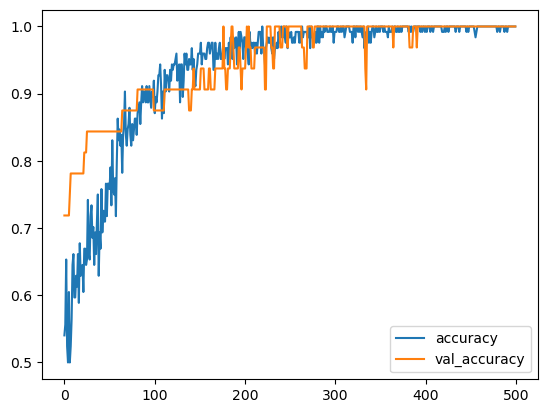

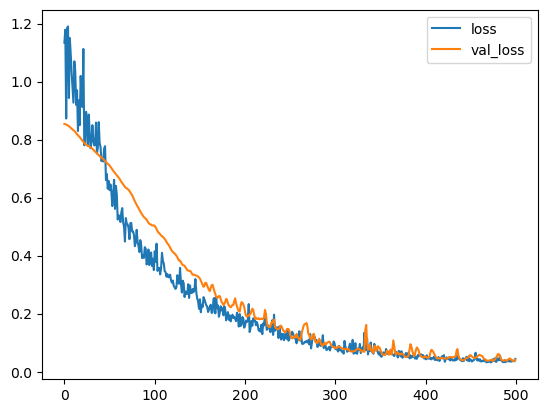

In [17]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.show()

# test

In [18]:
test_df.shape

(39, 17)

In [19]:
y_test=y_test[:,-1]
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1.], dtype=float32)

In [20]:
y_pred=model.predict(X_test)
y_pred[:,-1]

2/2 [==============================] - 0s 0s/step


array([9.9699140e-01, 8.9366430e-01, 9.6760923e-01, 9.9631941e-01,
       9.9319035e-01, 9.9172795e-01, 9.9749434e-01, 8.5586947e-01,
       9.9382591e-01, 9.9205810e-01, 1.2688171e-02, 9.9762398e-01,
       9.9724293e-01, 9.9621993e-01, 9.9648190e-01, 9.9887651e-01,
       9.6013957e-01, 9.9557120e-01, 8.3864301e-02, 9.9910849e-01,
       9.9443287e-01, 4.2036879e-01, 9.9620265e-01, 9.7023032e-05,
       9.9660021e-01, 9.9737000e-01, 9.9571937e-01, 9.8944783e-01,
       6.1131585e-03, 9.9632382e-01, 9.9868065e-01, 9.9452388e-01,
       9.9822527e-01, 6.0769682e-05, 9.9219513e-01, 7.2380542e-05,
       9.9715120e-01, 9.9235815e-01, 9.4700766e-01], dtype=float32)

In [21]:
# sns.distplot(y_pred[:,-1])

In [22]:
pred=np.where(y_pred>0.50,1,0)[:,-1]

In [23]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [24]:
cf=confusion_matrix(y_test,pred)
cf

array([[ 6,  1],
       [ 1, 31]], dtype=int64)

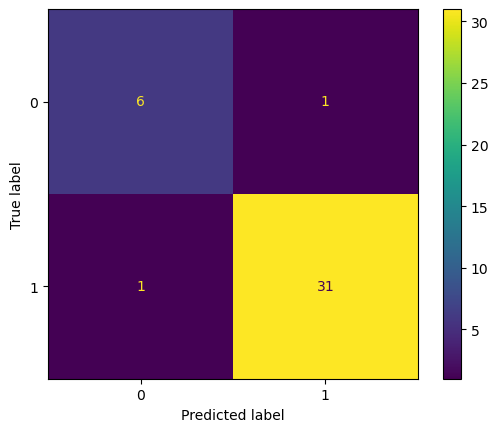

In [27]:
ConfusionMatrixDisplay(confusion_matrix=cf).plot()

In [25]:
acc=cf.diagonal().sum()/cf.sum()*100
acc

94.87179487179486

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86         7
         1.0       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39

